In [5]:
import pandas as pd

data = pd.read_csv('/kaggle/input/smoking/smoking_driking_dataset_Ver01.csv')

data.head()


,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [6]:
from pandas.api.types import is_numeric_dtype

# For each column, if the column is categorical, print a count of each data category
for col in data.columns:
    if not is_numeric_dtype(data[col]):
        print(data[col].value_counts())

sex
Male      526415
Female    464931
Name: count, dtype: int64
DRK_YN
N    495858
Y    495488
Name: count, dtype: int64


In [7]:
from sklearn import tree
import matplotlib.pyplot as plt
Y = data['DRK_YN']
X = data.drop(['sex','DRK_YN'],axis=1)
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X, Y)

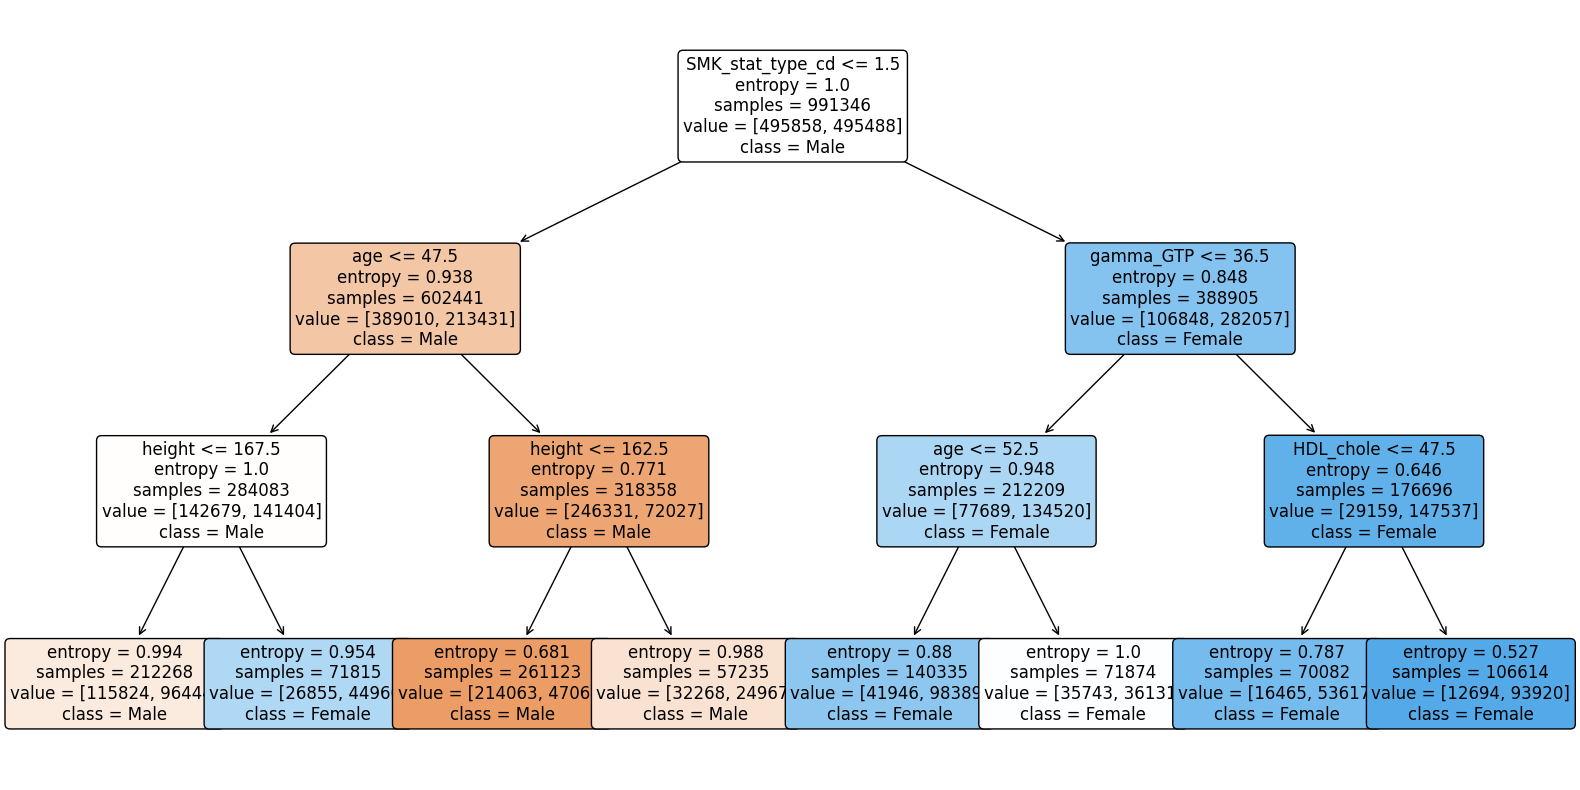

In [8]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left',
                                   'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole',
                                   'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'SGOT_AST',
                                   'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd'], 
                                    class_names=['Male', 'Female'], 
                                    filled=True, rounded=True, fontsize=12)
plt.show()

In [9]:
from sklearn.tree import export_text
tree_rules = export_text(clf, feature_names=['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left',
                                   'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole',
                                   'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'SGOT_AST',
                                   'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd'])
print(tree_rules)

|--- SMK_stat_type_cd <= 1.50
|   |--- age <= 47.50
|   |   |--- height <= 167.50
|   |   |   |--- class: N
|   |   |--- height >  167.50
|   |   |   |--- class: Y
|   |--- age >  47.50
|   |   |--- height <= 162.50
|   |   |   |--- class: N
|   |   |--- height >  162.50
|   |   |   |--- class: N
|--- SMK_stat_type_cd >  1.50
|   |--- gamma_GTP <= 36.50
|   |   |--- age <= 52.50
|   |   |   |--- class: Y
|   |   |--- age >  52.50
|   |   |   |--- class: Y
|   |--- gamma_GTP >  36.50
|   |   |--- HDL_chole <= 47.50
|   |   |   |--- class: Y
|   |   |--- HDL_chole >  47.50
|   |   |   |--- class: Y



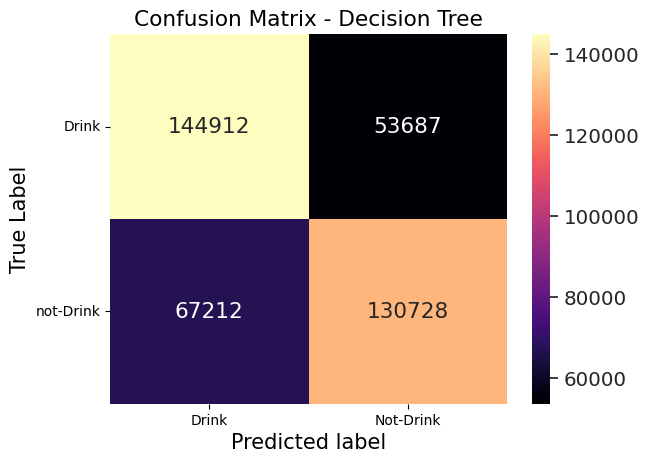

<Figure size 1000x700 with 0 Axes>

In [10]:
from sklearn.model_selection import train_test_split
X_train, test_x, y_train, test_lab = train_test_split(X,Y,test_size = 0.4,random_state = 42)
test_pred_decision_tree = clf.predict(test_x)
#import the relevant packages
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_lab,test_pred_decision_tree)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['Drink', 'Not-Drink'])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(['Drink', 'not-Drink'], rotation = 0)
plt.show()

In [11]:
print(metrics.classification_report(test_lab,test_pred_decision_tree))

              precision    recall  f1-score   support

           N       0.68      0.73      0.71    198599
           Y       0.71      0.66      0.68    197940

    accuracy                           0.70    396539
   macro avg       0.70      0.70      0.69    396539
weighted avg       0.70      0.70      0.69    396539



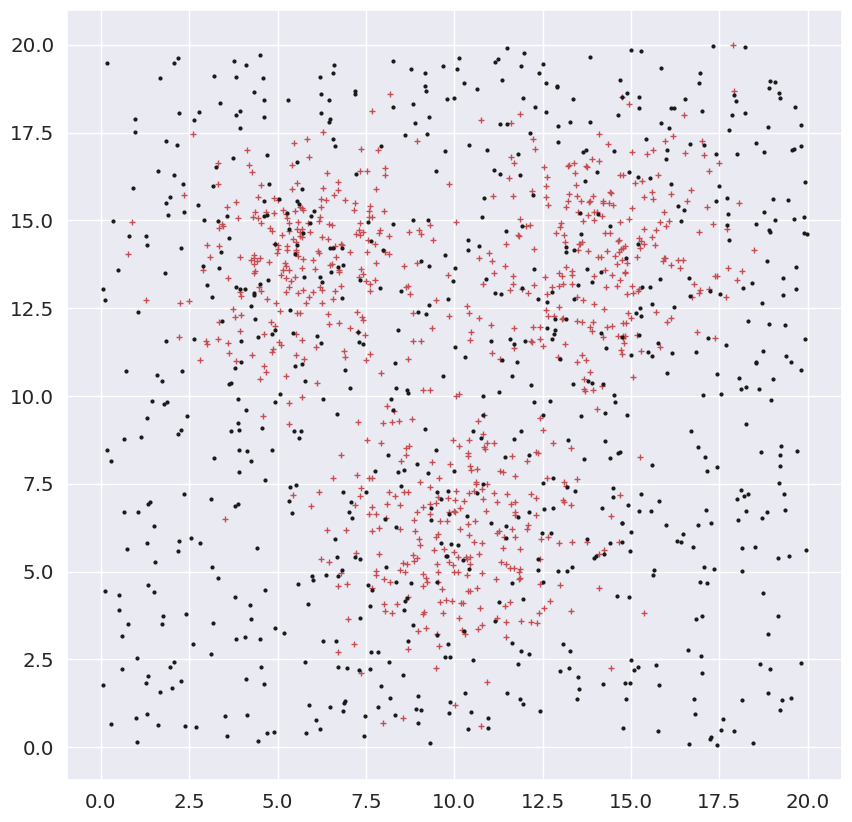

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random
%matplotlib inline
N = 1500
mean1 = [6, 14]
mean2 = [10, 6]
mean3 = [14, 14]
cov = [[3.5, 0], [0, 3.5]] # diagonal covariance
np.random.seed(50)
X = np.random.multivariate_normal(mean1, cov, int(N/6))
X = np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))
X = np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))
X = np.concatenate((X, 20*np.random.rand(int(N/2),2)))
Y = np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))
plt.figure(figsize=(10,10))
plt.plot(X[:int(N/2),0],X[:int(N/2),1],'r+',X[int(N/2):,0],X[int(N/2):,1],'k.',ms=4)

Text(0, 0.5, 'Accuracy')

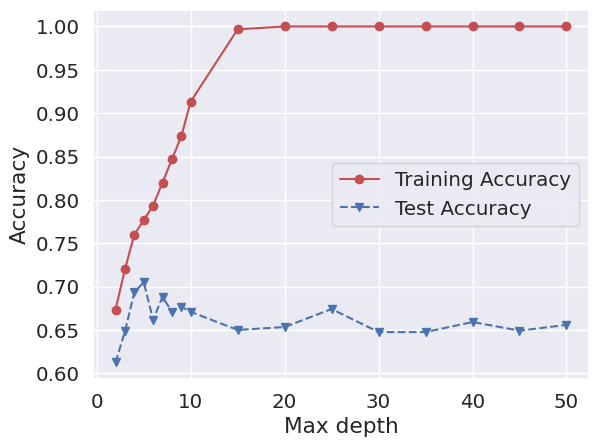

In [15]:
#########################################
# Training and Test set creation
#########################################
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)
from sklearn import tree
from sklearn.metrics import accuracy_score
#########################################
# Model fitting and evaluation
#########################################
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
#########################################
# Plot of training and test accuracies
#########################################
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [16]:
#Import svm model
from sklearn import svm
#split the dataset
from sklearn.model_selection import train_test_split
X_train, test_x, y_train, test_lab = train_test_split(X,Y,test_size = 0.3,random_state = 42)
#Create a svm Classifier
clf = svm.SVC(kernel='linear') 
# Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(test_x)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_lab, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(test_lab, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(test_lab, y_pred))

Accuracy: 0.5555555555555556
Precision: 0.5340909090909091
Recall: 0.6467889908256881
